In [1]:
import numpy as np
import gzip
import pickle
import sys
import copy
import os.path
from copy import deepcopy

import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

# Split MNIST

In [18]:
with open('results/split_mnist_ibp.pkl', 'rb') as input_file:
    d = pickle.load(input_file)
d.keys()

dict_keys(['vcl_ibp', 'vcl_baselines', 'uncerts_ibp', 'uncerts_vcl_baselines', 'Z'])

In [19]:
ibp_acc = d['vcl_ibp'] 
vcl_result_h5 = d['vcl_baselines'][5]
vcl_result_h50 = d['vcl_baselines'][50]
vcl_result_h100 = d['vcl_baselines'][100]
_ibp_acc = np.mean(ibp_acc, 0)
_vcl_result_h5 = np.mean(vcl_result_h5, 0)
_vcl_result_h50 = np.mean(vcl_result_h50, 0)
_vcl_result_h100 = np.mean(vcl_result_h100, 0)
__ibp_acc = np.nanmean(ibp_acc, (0,1))
__vcl_result_h5 = np.nanmean(vcl_result_h5, (0,1))
__vcl_result_h50 = np.nanmean(vcl_result_h50, (0,1))
__vcl_result_h100 = np.nanmean(vcl_result_h100, (0,1))

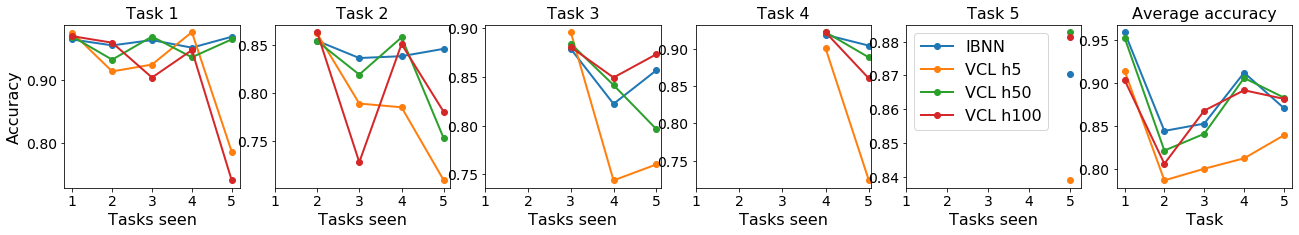

In [20]:
from matplotlib.ticker import FormatStrFormatter
lw = 2
grid_color = '0.1'
grid_lw = 0.2
title_size = 16
label_size = 22
tick_size = 14
legend_size = 16

titles = {0: "Task 1",
          1: "Task 2",
          2: "Task 3",
          3: "Task 4",
          4: "Task 5"}
no_tasks=5
fig, ax = plt.subplots(1, 6, figsize=(22, 3))
for i in range(no_tasks):
    ax[i].plot(np.arange(len(_ibp_acc[:, i]))+1, _ibp_acc[:, i], label='IBNN', marker='o', linewidth=lw)
    ax[i].plot(np.arange(len(_vcl_result_h5[:, i]))+1, _vcl_result_h5[:, i], label='VCL h5', marker='o', linewidth=lw)
    ax[i].plot(np.arange(len(_vcl_result_h50[:, i]))+1, _vcl_result_h50[:, i], label='VCL h50', marker='o', linewidth=lw)
    ax[i].plot(np.arange(len(_vcl_result_h100[:, i]))+1, _vcl_result_h100[:, i], label='VCL h100', marker='o', linewidth=lw)
    ax[i].set_title(titles[i], fontsize=legend_size)
    ax[i].set_xticks(range(1, len(_ibp_acc[:,i])+1))
    ax[i].set_xlabel('Tasks seen', fontsize=legend_size)
    ax[i].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    ax[i].tick_params(labelsize=tick_size)
    if i == 4:
        ax[i].legend(fontsize=legend_size)
    if i == 0:
        ax[i].set_ylabel('Accuracy', fontsize=legend_size)
ax[5].plot(np.arange(len(__ibp_acc))+1, __ibp_acc, label='IBNN', marker='o', linewidth=lw)
ax[5].plot(np.arange(len(__ibp_acc))+1, __vcl_result_h5, label='VCL h5', marker='o', linewidth=lw)
ax[5].plot(np.arange(len(__ibp_acc))+1, __vcl_result_h50, label='VCL h50', marker='o', linewidth=lw)
ax[5].plot(np.arange(len(__ibp_acc))+1, __vcl_result_h100, label='VCL h100', marker='o', linewidth=lw)
ax[5].set_xticks(range(1, len(_ibp_acc)+1))
ax[5].set_title('Average accuracy', fontsize=legend_size)
ax[5].set_xlabel('Task', fontsize=legend_size)
ax[5].tick_params(labelsize=tick_size)
ax[5].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
#ax[5].legend()
#plt.savefig("plots/accs_ibp_perm_mh_all.pdf", bbox_inches='tight')
fig.show()

In [21]:
##### Box plot params
grid_color = '0.1'
grid_lw = 0.2

title_size = 16
label_size = 16
tick_size = 14
legend_size = 16

num_layers = 2
num_tasks = 5
ticks = [str(i) for i in np.arange(5)+1]
fig_size=(4, 3)

def set_box_color(bp, color):
    plt.setp(bp['boxes'], color='black', lw=1.5)
    plt.setp(bp['whiskers'], color='black', lw=1.5)
    plt.setp(bp['caps'], color=color, lw=2)
    plt.setp(bp['medians'], color=color, lw=2)

In [22]:
Z_ibp = d['Z']

num_runs = 1
num_layers=1
num_tasks=5
_Z_ibp = []
for j in range(num_tasks*num_layers):
    tmp = []
    for i in range(num_runs):
        tmp.append(np.squeeze(Z_ibp[i][j]))
    _Z_ibp.append(tmp)
    
__Z_ibp = [np.concatenate(_Z_ibp[i], axis=0) for i in range(num_tasks*num_layers)]

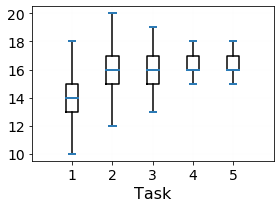

In [23]:
plt.figure(figsize=fig_size)
grid_color = '0.1'
grid_lw = 0.2
bpr = plt.boxplot([np.sum(np.asarray(np.squeeze(__Z_ibp[i] > 0.1)).astype(int), axis=1).reshape(-1) for i in range(num_tasks)],
                  positions=np.array(range(num_tasks))*2.0, sym='', widths=0.6)
set_box_color(bpr, '#2C7BB6')

plt.grid(True, which="both", color=grid_color, linewidth=0.1, alpha=0.1)
plt.xticks(range(0, len(ticks) * 2, 2), ticks, fontsize=tick_size)
plt.yticks(fontsize=tick_size)
plt.xlim(-2, len(ticks)*2)
plt.xlabel('Task', fontsize=label_size)
plt.tight_layout()
plt.show()

## Permuted MNIST

In [2]:
with open('results/permuted_mnist_ibp.pkl', 'rb') as input_file:
    d = pickle.load(input_file)
d.keys()

dict_keys(['vcl_ibp', 'vcl_baselines', 'uncerts_ibp', 'uncerts_vcl_baselines', 'Z'])

In [8]:
ibp_acc = d['vcl_ibp'] 
vcl_result_h5 = d['vcl_baselines'][5]
vcl_result_h50 = d['vcl_baselines'][50]
vcl_result_h100 = d['vcl_baselines'][100]
_ibp_acc = np.mean(ibp_acc, 0)
_vcl_result_h5 = np.mean(vcl_result_h5, 0)
_vcl_result_h50 = np.mean(vcl_result_h50, 0)
_vcl_result_h100 = np.mean(vcl_result_h100, 0)
__ibp_acc = np.nanmean(ibp_acc, (0,1))
__vcl_result_h5 = np.nanmean(vcl_result_h5, (0,1))
__vcl_result_h50 = np.nanmean(vcl_result_h50, (0,1))
__vcl_result_h100 = np.nanmean(vcl_result_h100, (0,1))

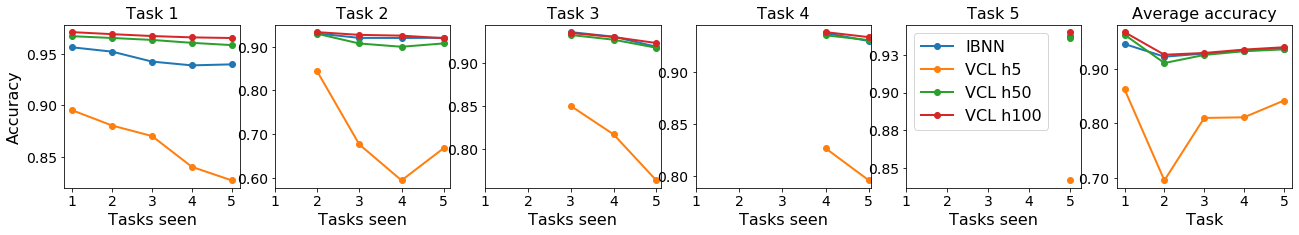

In [9]:
from matplotlib.ticker import FormatStrFormatter
lw = 2
grid_color = '0.1'
grid_lw = 0.2
title_size = 16
label_size = 22
tick_size = 14
legend_size = 16

titles = {0: "Task 1",
          1: "Task 2",
          2: "Task 3",
          3: "Task 4",
          4: "Task 5"}
no_tasks=5
fig, ax = plt.subplots(1, 6, figsize=(22, 3))
for i in range(no_tasks):
    ax[i].plot(np.arange(len(_ibp_acc[:, i]))+1, _ibp_acc[:, i], label='IBNN', marker='o', linewidth=lw)
    ax[i].plot(np.arange(len(_vcl_result_h5[:, i]))+1, _vcl_result_h5[:, i], label='VCL h5', marker='o', linewidth=lw)
    ax[i].plot(np.arange(len(_vcl_result_h50[:, i]))+1, _vcl_result_h50[:, i], label='VCL h50', marker='o', linewidth=lw)
    ax[i].plot(np.arange(len(_vcl_result_h100[:, i]))+1, _vcl_result_h100[:, i], label='VCL h100', marker='o', linewidth=lw)
    ax[i].set_title(titles[i], fontsize=legend_size)
    ax[i].set_xticks(range(1, len(_ibp_acc[:,i])+1))
    ax[i].set_xlabel('Tasks seen', fontsize=legend_size)
    ax[i].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    ax[i].tick_params(labelsize=tick_size)
    if i == 4:
        ax[i].legend(fontsize=legend_size)
    if i == 0:
        ax[i].set_ylabel('Accuracy', fontsize=legend_size)
ax[5].plot(np.arange(len(__ibp_acc))+1, __ibp_acc, label='IBNN', marker='o', linewidth=lw)
ax[5].plot(np.arange(len(__ibp_acc))+1, __vcl_result_h5, label='VCL h5', marker='o', linewidth=lw)
ax[5].plot(np.arange(len(__ibp_acc))+1, __vcl_result_h50, label='VCL h50', marker='o', linewidth=lw)
ax[5].plot(np.arange(len(__ibp_acc))+1, __vcl_result_h100, label='VCL h100', marker='o', linewidth=lw)
ax[5].set_xticks(range(1, len(_ibp_acc)+1))
ax[5].set_title('Average accuracy', fontsize=legend_size)
ax[5].set_xlabel('Task', fontsize=legend_size)
ax[5].tick_params(labelsize=tick_size)
ax[5].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
#ax[5].legend()
#plt.savefig("plots/accs_ibp_perm_mh_all.pdf", bbox_inches='tight')
fig.show()

In [11]:
##### Box plot params
grid_color = '0.1'
grid_lw = 0.2

title_size = 16
label_size = 16
tick_size = 14
legend_size = 16

num_layers = 2
num_tasks = 5
ticks = [str(i) for i in np.arange(5)+1]
fig_size=(4, 3)

def set_box_color(bp, color):
    plt.setp(bp['boxes'], color='black', lw=1.5)
    plt.setp(bp['whiskers'], color='black', lw=1.5)
    plt.setp(bp['caps'], color=color, lw=2)
    plt.setp(bp['medians'], color=color, lw=2)

In [12]:
Z_ibp = d['Z']

num_runs = 1
num_layers=1
num_tasks=5
_Z_ibp = []
for j in range(num_tasks*num_layers):
    tmp = []
    for i in range(num_runs):
        tmp.append(np.squeeze(Z_ibp[i][j]))
    _Z_ibp.append(tmp)
    
__Z_ibp = [np.concatenate(_Z_ibp[i], axis=0) for i in range(num_tasks*num_layers)]

In [13]:
__Z_ibp[0].shape

(10000, 100)

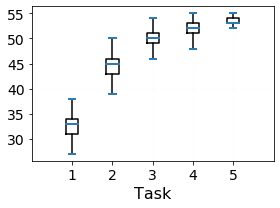

In [14]:
plt.figure(figsize=fig_size)
grid_color = '0.1'
grid_lw = 0.2

if num_layers==2:
    bpl = plt.boxplot([np.sum(np.asarray(np.squeeze(__Z_ibp[2*i] > 0.1)).astype(int), axis=2).reshape(-1) for i in range(num_tasks)],
                      positions=np.array(range(num_tasks))*2.0-0.4, sym='', widths=0.6)
    bpr = plt.boxplot([np.sum(np.asarray(np.squeeze(__Z_ibp[2*i + 1] > 0.1)).astype(int), axis=2).reshape(-1) for i in range(num_tasks)],
                      positions=np.array(range(num_tasks))*2.0+0.4, sym='', widths=0.6)
    set_box_color(bpl, '#D7191C') # colors are from http://colorbrewer2.org/
    set_box_color(bpr, '#2C7BB6')

    # draw temporary red and blue lines and use them to create a legend
    plt.plot([], c='#D7191C', label='Layer 1')
    plt.plot([], c='#2C7BB6', label='Layer 2')
    plt.legend(fontsize=legend_size)
elif num_layers==1:
    bpr = plt.boxplot([np.sum(np.asarray(np.squeeze(__Z_ibp[i] > 0.1)).astype(int), axis=1).reshape(-1) for i in range(num_tasks)],
                      positions=np.array(range(num_tasks))*2.0, sym='', widths=0.6)
    set_box_color(bpr, '#2C7BB6')

plt.grid(True, which="both", color=grid_color, linewidth=0.1, alpha=0.1)
plt.xticks(range(0, len(ticks) * 2, 2), ticks, fontsize=tick_size)
plt.yticks(fontsize=tick_size)
plt.xlim(-2, len(ticks)*2)
plt.xlabel('Task', fontsize=label_size)
plt.tight_layout()
#plt.savefig('plots/Zs_bp_perm_mh_ibp.pdf', bbox_inches='tight')
plt.show()

# Weight pruning

In [24]:
with open('results/weight_pruning_hibp_wp.pkl', 'rb') as input_file:
    d = pickle.load(input_file)
d.keys()

dict_keys(['xs', 'ya_nnvi', 'yb_nnvi', 'ya_ibp', 'yb_ibp'])

In [25]:
xs = d['xs']
ya = d['ya_nnvi']
yb = d['yb_nnvi']
ya_hibp = d['ya_ibp']
yb_hibp = d['yb_ibp']

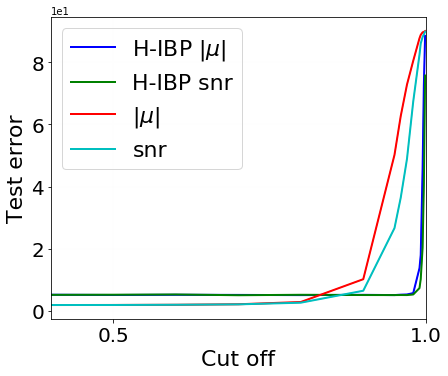

In [26]:
_hibp_ya_mean = np.mean(ya_hibp, axis=0)
_hibp_ya_std = np.std(ya_hibp, axis=0)
_hibp_yb_mean = np.mean(yb_hibp, axis=0)
_hibp_yb_std = np.std(yb_hibp, axis=0)
_ya_mean = np.mean(ya, axis=0)
_ya_std = np.std(ya, axis=0)
_yb_mean = np.mean(yb, axis=0)
_yb_std = np.std(yb, axis=0)

def test_error(ls):
    return 100*(1-np.array(ls))

fig_size = (6, 5)

set_y_axis = False

lw = 2

grid_color = '0.1'
grid_lw = 0.2

title_size = 16
label_size = 22
tick_size = 20
legend_size = 22

fig, ax = plt.subplots(1, 1, figsize=fig_size)

ax.plot(xs, test_error(_hibp_ya_mean), linewidth=lw, color='b')
ax.fill_between(xs,
               test_error([x - y for x, y in zip(_hibp_ya_mean, _hibp_ya_std)]),
               test_error([x + y for x, y in zip(_hibp_ya_mean, _hibp_ya_std)]),
               alpha=0.3, color='b')

ax.plot(xs, test_error(_hibp_yb_mean), linewidth=lw, color='g')
ax.fill_between(xs,
               test_error([x - y for x, y in zip(_hibp_yb_mean, _hibp_yb_std)]),
               test_error([x + y for x, y in zip(_hibp_yb_mean, _hibp_yb_std)]),
               alpha=0.3, color='g')

ax.plot(xs, test_error(_ya_mean), linewidth=lw, color='r')
ax.fill_between(xs,
               test_error([x - y for x, y in zip(_ya_mean, _ya_std)]),
               test_error([x + y for x, y in zip(_ya_mean, _ya_std)]),
               alpha=0.3, color='r')

ax.plot(xs, test_error(_yb_mean), linewidth=lw, color='c')
ax.fill_between(xs,
               test_error([x - y for x, y in zip(_yb_mean, _yb_std)]),
               test_error([x + y for x, y in zip(_yb_mean, _yb_std)]),
               alpha=0.3, color='c')

plt.grid(True, which="both", color=grid_color, linewidth=0.1, alpha=0.1)
ax.set_xlim(0.0, 0.5)
plt.yticks(fontsize=tick_size)
x_ticks = np.arange(0.0, 1.5, step=0.5)
plt.xticks(x_ticks, fontsize=tick_size)
plt.ticklabel_format(axis='y')
ax = fig.gca()
ax.ticklabel_format(axis='y', style='sci', scilimits=(-1, 1))
#ax.set_yticklabels([])
#plt.yscale('log')
plt.legend(["H-IBP $|\mu|$", 'H-IBP snr', '$|\mu|$', 'snr'], fontsize=legend_size, loc='upper left')
plt.tight_layout()
plt.xlabel("Cut off", fontsize=legend_size)
plt.ylabel("Test error", fontsize=legend_size)
plt.xlim(0.4, 1.0)
plt.show()